In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as P
from scipy import stats

import textwrap

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn import linear_model
from regress2 import regress2
import seaborn as sns

In [2]:
dst = '../traditional/results/'

col_names = ['bname', 'wname',
             'nut_length','nut_height', 'nut_width',
             'nut_vol',
             'nut_va3d',
             'nut_ratio_feret',
             'nut_inv_ratio_feret',
             'nut_area',
             'nut_sphericity',
             'nut_cnvx_area',
             'nut_cnvx_vol',
             'nut_ratio_cnvx_area',
             'nut_ratio_cnvx_vol',
             'nut_inv_ratio_cnvx_area',
             'nut_inv_ratio_cnvx_vol',
             'krumbein',
             'corey',
             'sneed',
             'janke',
             'wadell',
             'air_vol', 'meat_vol', 'shell_vol', 'vein_vol',
             'air_ratio_vol', 'meat_ratio_vol', 'shell_ratio_vol', 'vein_ratio_vol',
             'shell_rugosity',
             'shell_thickness',
             'meat_length', 'meat_height', 'meat_width',
             'meat_area',
             'meat_cnvx_vol',
             'meat_cnvx_area',
             'meat_ratio_cnvx_area',
             'meat_inv_ratio_cnvx_area',
             'meat_ratio_cnvx_vol',
             'meat_inv_ratio_cnvx_vol']

col_labels =['Batch Name', 'Scan Name',
             'Nut Length','Nut Height', 'Nut Width',
             'Nut Volume',
             'Nut VA3D',
             'Nut Feret Ratio',
             'Nut Inverse Feret Ratio',
             'Nut Surface Area',
             'Nut Sphericity',
             'Nut Convex Surface Area',
             'Nut Convex Volume',
             'Nut Convex Area Ratio',
             'Nut Convex Volume Ratio',
             'Nut Convex Area Inverse Ratio',
             'Nut Convex Volume Inverse Ratio',
             'Krumbein Index',
             'Corey Index',
             'Sneed Index',
             'Janke Index',
             'Wadell Index',
             'Air Volume', 'Kernel Volume', 'Shell Volume', 'Packing Volume',
             'Air Volume Ratio', 'Kernel Volume Ratio', 'Shell Volume Ratio', 'Packing Volume Ratio',
             'Shell Rugosity',
             'Shell Thickness',
             'Kernel Length', 'Kernel Height', 'Kernel Width',
             'Kernel Surface Area',
             'Kernel Convex Volume',
             'Kernel Convex Surface Area',
             'Kernel Convex Area Ratio',
             'Kernel Convex Area Inverse Ratio',
             'Kernel Convex Volume Ratio',
             'Kernel Convex Volume Inverse Ratio']

col_units = ['', '',
             ' [mm]',' [mm]', ' [mm]',
             ' [mm$^3$]',
             '',
             '',
             '',
             ' [mm$^2$]',
             '',
             ' [mm$^2$]',
             ' [mm$^3$]',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             '',
             ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]', ' [mm$^3$]',
             '', '', '', '',
             '',
             ' [mm]',
             ' [mm]', ' [mm]', ' [mm]',
             ' [mm$^2$]',
             ' [mm$^3$]',
             ' [mm$^2$]',
             '',
             '',
             '',
             '']

filename = '../traditional/traditional_phenotypes.csv'
data = pd.read_csv(filename, header=None, dtype={1:str}, names=col_names)
data.loc[data['bname'] == '201SBa_R5_T55', 'bname'] = '2014SBa_R5_T55'
print(data.shape)
data.head()

(256, 42)


,bname,wname,nut_length,nut_height,nut_width,nut_vol,nut_va3d,nut_ratio_feret,nut_inv_ratio_feret,nut_area,...,meat_length,meat_height,meat_width,meat_area,meat_cnvx_vol,meat_cnvx_area,meat_ratio_cnvx_area,meat_inv_ratio_cnvx_area,meat_ratio_cnvx_vol,meat_inv_ratio_cnvx_vol
0,2011SBb_R3_T9,001,44.073663,35.150448,33.660939,23040.136752,5.208330,1.309341,0.763743,6787.455472,...,33.180970,28.994712,24.460782,6924.516663,12834.276489,2782.111291,0.401777,2.488943,1.772462,0.564187
1,2011SBb_R3_T9,002,41.103359,34.655031,32.860105,21108.165855,4.963408,1.250859,0.799451,6300.540289,...,32.248283,29.578038,25.238816,6689.994088,11799.835961,2629.836554,0.393100,2.543882,1.782206,0.561102
2,2011SBb_R3_T9,003,40.768290,29.806522,31.384786,19007.064033,5.029102,1.367764,0.731120,5900.982029,...,35.585820,23.960211,23.664456,5992.820862,11047.164727,2551.859427,0.425819,2.348413,1.769201,0.565227
3,2011SBb_R3_T9,004,41.251854,33.754864,31.708176,19585.538927,4.999455,1.300985,0.768649,6008.259833,...,29.540008,26.398710,21.573252,5703.743416,8956.704148,2193.300728,0.384537,2.600530,1.864169,0.536432
4,2011SBb_R3_T9,005,42.239003,36.618022,34.757264,23863.405277,5.244844,1.215257,0.822871,6964.392990,...,32.225959,31.709762,27.526845,7403.493450,14284.090093,2969.858606,0.401143,2.492877,1.839616,0.543592


In [3]:
for i in range(2,len(col_labels)):
    print(i,col_labels[i],sep='\t')

2	Nut Length
3	Nut Height
4	Nut Width
5	Nut Volume
6	Nut VA3D
7	Nut Feret Ratio
8	Nut Inverse Feret Ratio
9	Nut Surface Area
10	Nut Sphericity
11	Nut Convex Surface Area
12	Nut Convex Volume
13	Nut Convex Area Ratio
14	Nut Convex Volume Ratio
15	Nut Convex Area Inverse Ratio
16	Nut Convex Volume Inverse Ratio
17	Krumbein Index
18	Corey Index
19	Sneed Index
20	Janke Index
21	Wadell Index
22	Air Volume
23	Kernel Volume
24	Shell Volume
25	Packing Volume
26	Air Volume Ratio
27	Kernel Volume Ratio
28	Shell Volume Ratio
29	Packing Volume Ratio
30	Shell Rugosity
31	Shell Thickness
32	Kernel Length
33	Kernel Height
34	Kernel Width
35	Kernel Surface Area
36	Kernel Convex Volume
37	Kernel Convex Surface Area
38	Kernel Convex Area Ratio
39	Kernel Convex Area Inverse Ratio
40	Kernel Convex Volume Ratio
41	Kernel Convex Volume Inverse Ratio


In [4]:
mmtraits = [2,3,4,5,6,8,9,17,18,19,22,23,24,25,26,27,28,29,31,32,33,34,35]
mmtraits = np.asarray(mmtraits)

In [90]:
ratios = np.array([8,13,14,38,40])
data.iloc[:, ratios].describe()

,nut_inv_ratio_feret,nut_ratio_cnvx_area,nut_ratio_cnvx_vol,meat_ratio_cnvx_area,meat_ratio_cnvx_vol
count,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.821125,0.635611,1.048413,0.378233,1.846942
std,0.077163,0.010973,0.017822,0.023561,0.367564
min,0.648144,0.599471,1.018106,0.312118,1.503945
25%,0.760965,0.628331,1.034844,0.361224,1.681745
50%,0.813671,0.637051,1.044742,0.375669,1.770063
75%,0.873761,0.643349,1.058685,0.393766,1.874983
max,0.997779,0.664746,1.115306,0.509361,4.851768


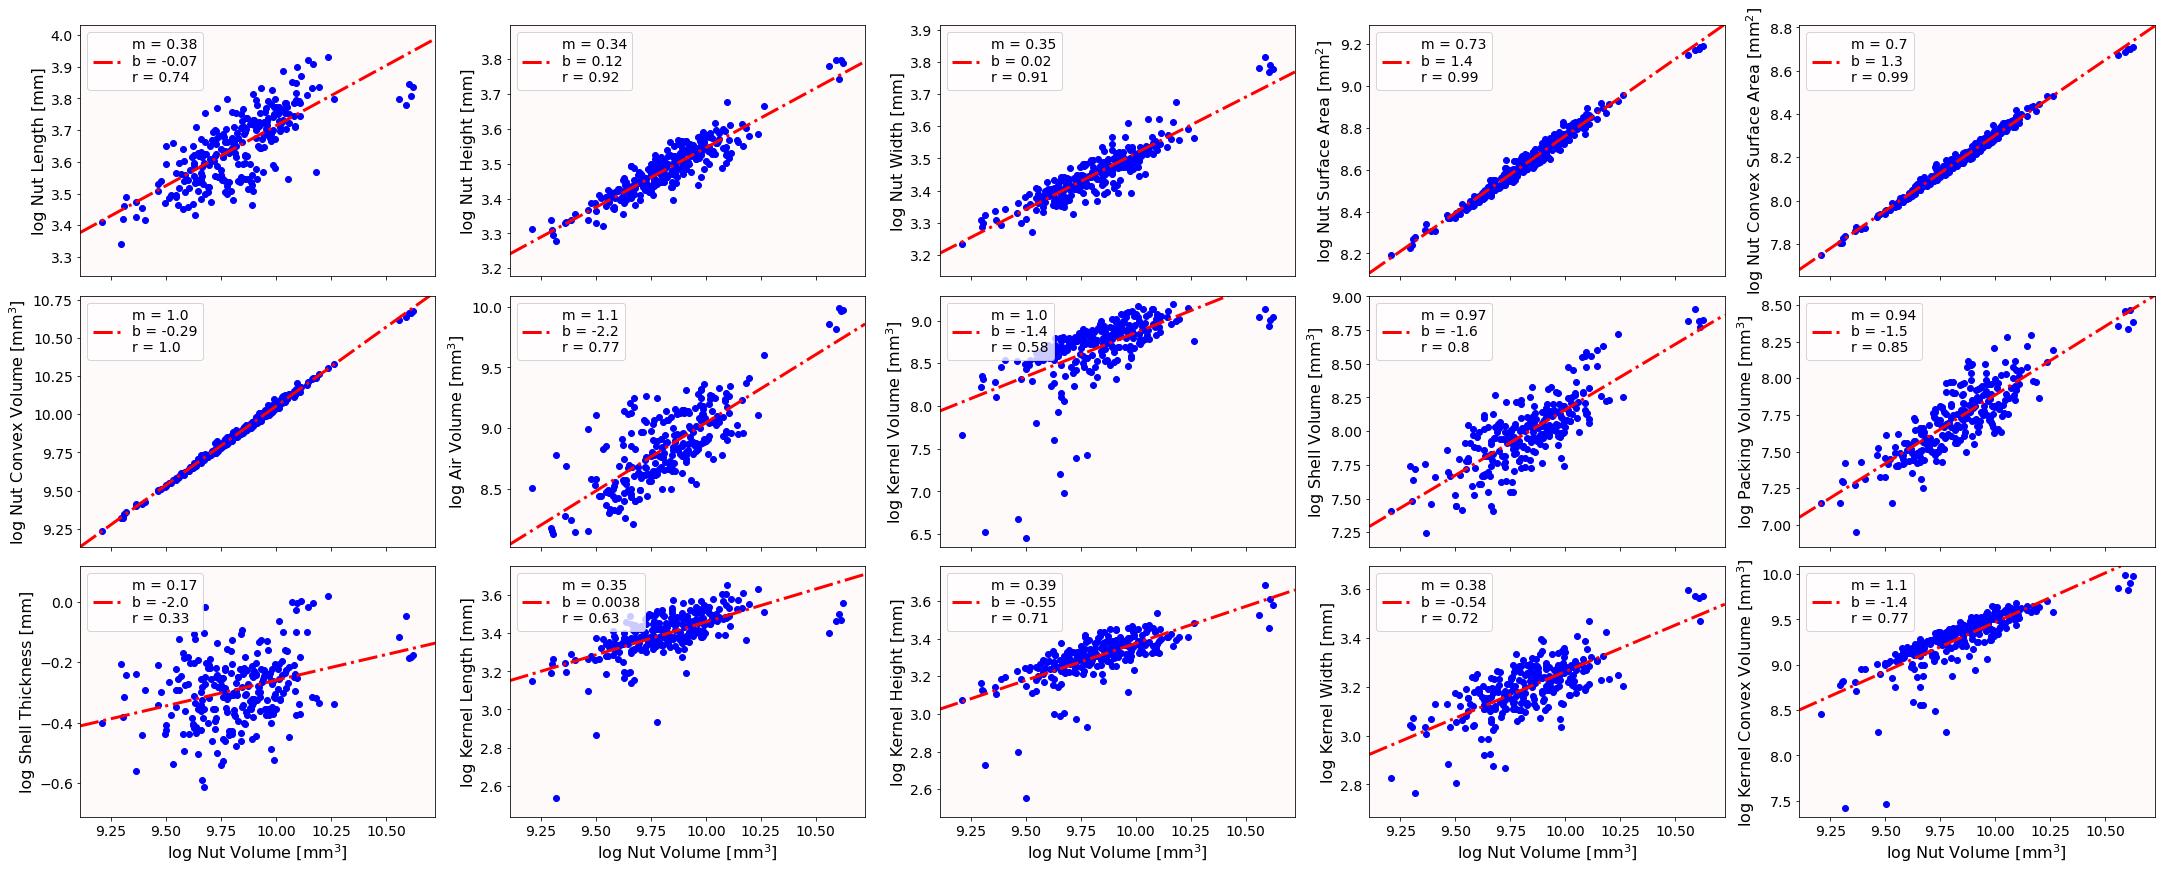

In [79]:
fs = 14
fig, ax = plt.subplots(3,5, figsize=(30,12), sharex=True)
ax = np.atleast_1d(ax).ravel()

i,j = 5,22
trait_i = np.log(data.iloc[:,i].values)

for idx,j in enumerate([2,3,4,9,11,12,22,23,24,25,31,32,33,34,36]):

    trait_j = np.log(data.iloc[:,j].values)
    r,p = stats.pearsonr(trait_i, trait_j)

    ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
    ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)

    new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
    foo = new_series.convert().coef
    r2 = r2_score(trait_j, new_series(trait_i))
    axlabel = 'm = {:.2}\nb = {:.2}\nr = {:.2}'.format(foo[1], foo[0], r)
    bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)

    ax[idx].scatter(trait_i, trait_j, color='b')
    ax[idx].set_ylabel('log ' + col_labels[j] + col_units[j], fontsize=fs+2);
    ax[idx].legend(loc='upper left', fontsize=fs)

for idx in range(10,len(ax)):
    ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);
    
fig.tight_layout()
filename = dst + col_labels[i].lower().replace(' ','_') + '_allometry'

plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

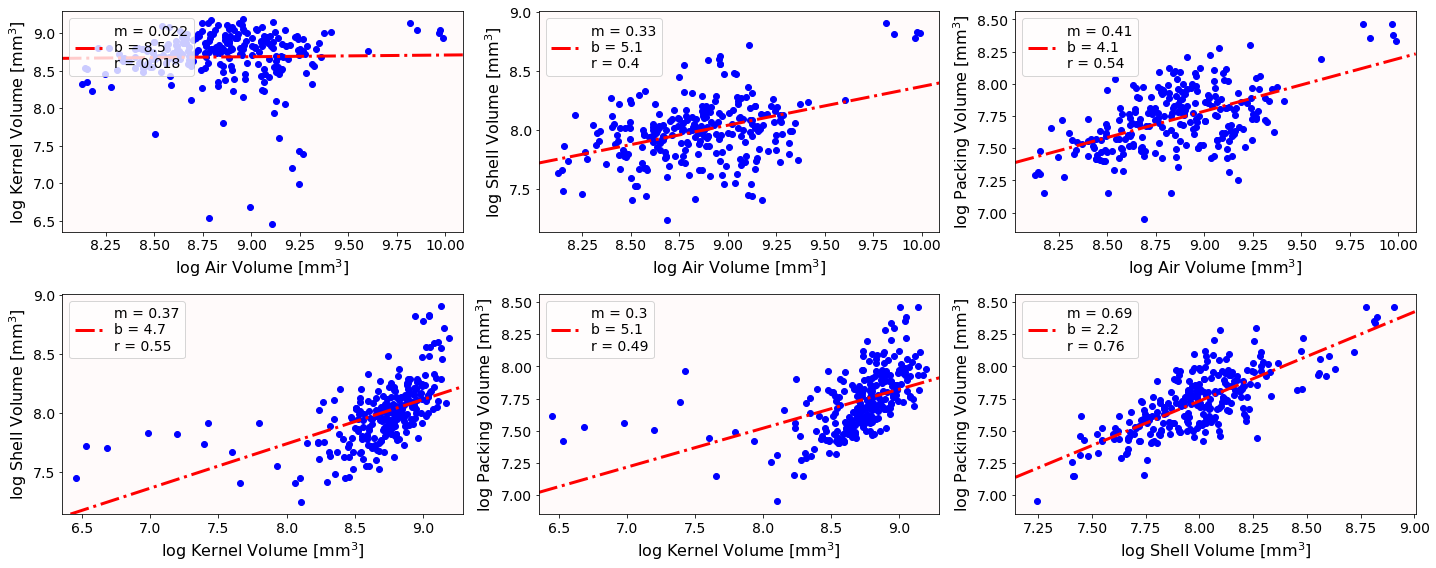

In [83]:
fs = 14
fig, ax = plt.subplots(2,3, figsize=(20,8))
ax = np.atleast_1d(ax).ravel()

idx = 0
for i in range(22,26):
    trait_i = np.log(data.iloc[:,i].values)
    for j in range(i+1, 26):
        trait_j = np.log(data.iloc[:,j].values)
        r,p = stats.pearsonr(trait_i, trait_j)

        ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
        ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
        ax[idx].set_facecolor('snow')
        ax[idx].tick_params(labelsize=fs)

        new_series = P.Polynomial.fit(trait_i,trait_j, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(trait_j, new_series(trait_i))
        axlabel = 'm = {:.2}\nb = {:.2}\nr = {:.2}'.format(foo[1], foo[0], r)
        bar = ax[idx].axline(xy1=(0,foo[0]), slope=foo[1], color='r', label=axlabel, ls='-.', lw=3)

        ax[idx].scatter(trait_i, trait_j, color='b')
        ax[idx].set_ylabel('log ' + col_labels[j] + col_units[j], fontsize=fs+2);
        ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);
        ax[idx].legend(loc='upper left', fontsize=fs)
        idx += 1

#for idx in range(10,len(ax)):
#    ax[idx].set_xlabel('log ' + col_labels[i] + col_units[i], fontsize=fs+2);
    
fig.tight_layout()
filename = dst + 'individual_tissue_allometry'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

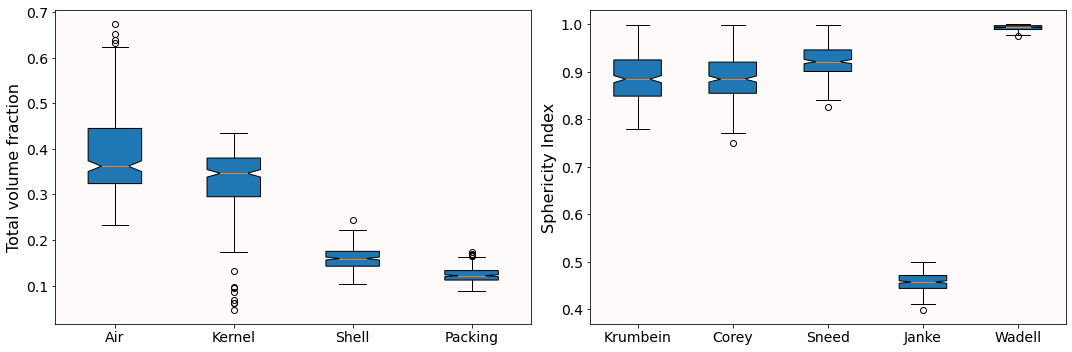

In [99]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax = np.atleast_1d(ax).ravel()

idx = 0; ss=np.s_[26:30]; labels = [(s.split(' ')[0]) for s in col_labels[ss]]
ax[idx].boxplot(data.iloc[:,ss].values, notch=True, vert=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Total volume fraction', fontsize=fs+2)

#idx = 1; ss=ratios; labels = [(s.split(' ')[0]) for s in list(np.asarray(col_labels)[ratios])]
#ax[idx].boxplot(data.iloc[:,ss].values, vert=True, notch=True, patch_artist=True, labels=labels);
#ax[idx].set_ylabel('Sphericity Index', fontsize=fs+2)

idx = 1; ss=np.s_[17:22]; labels = [(s.split(' ')[0]) for s in col_labels[ss]]
ax[idx].boxplot(data.iloc[:,ss].values, vert=True, notch=True, patch_artist=True, labels=labels);
ax[idx].set_ylabel('Sphericity Index', fontsize=fs+2)

for idx in range(len(ax)):
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
fig.tight_layout()

filename = dst + 'volratio_sphericty_box_plots'
#plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
#plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

# Correlation

In [69]:
pcorr = data.iloc[:,mmtraits].corr(method='pearson')
scorr = data.iloc[:,mmtraits].corr(method='spearman')

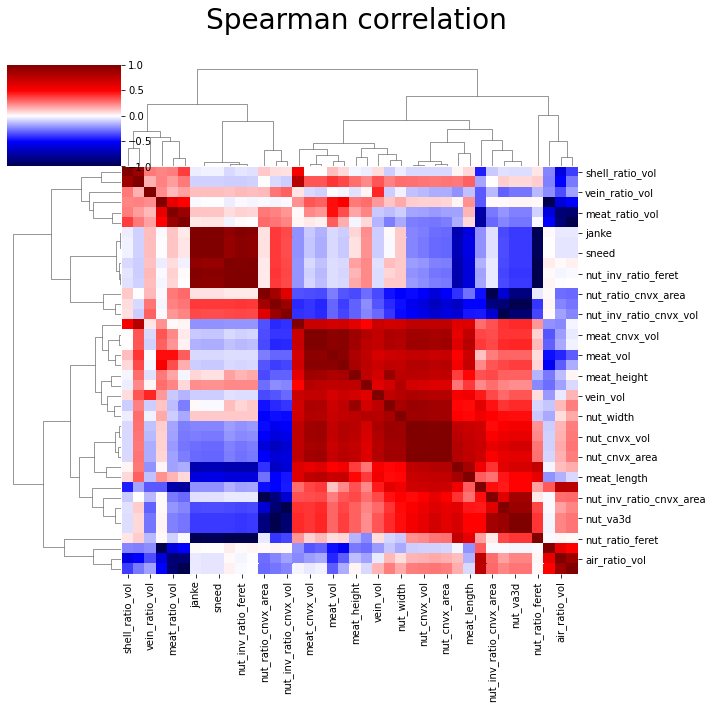

In [70]:
vmin, vmax = -1,1
cmap = 'seismic'

sns.clustermap(scorr, method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Spearman correlation', fontsize=28);

filename = dst + 'spearman_correlation_ext'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

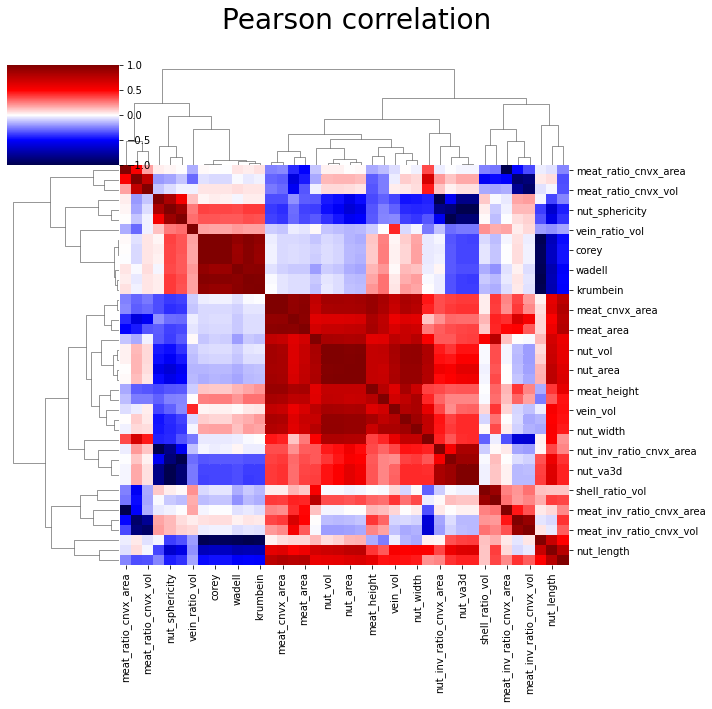

In [71]:
sns.clustermap(pcorr, method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Pearson correlation', fontsize=28);

filename = dst + 'pearson_correlation_ext'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Linear models

In [19]:
# mmtraits = [2,3,4,5,6,8,9,17,18,19,22,23,24,25,26,27,28,29,31,32,33,34,35]
# mmtraits = np.asarray(mmtraits)
mmtraits = np.arange(2, data.shape[1])

ols_m = np.zeros((len(mmtraits), len(mmtraits)))
ols_b = ols_m.copy()
ols_r = ols_m.copy()
ols_p = ols_m.copy()
ols_R2 = ols_m.copy()

for i in range(len(ols_m)):
    for j in range(len(ols_m)):
        trait_i = np.log(data.iloc[:,mmtraits[i]].values)
        trait_j = np.log(data.iloc[:,mmtraits[j]].values)

        ols = stats.linregress(trait_i, trait_j)
        
        ols_R2[i,j] = r2_score(trait_j, ols.slope*trait_i + ols.intercept)
        ols_m[i, j] = ols.slope
        ols_b[i, j] = ols.intercept
        ols_p[i, j] = ols.pvalue
        ols_r[i, j] = ols.rvalue

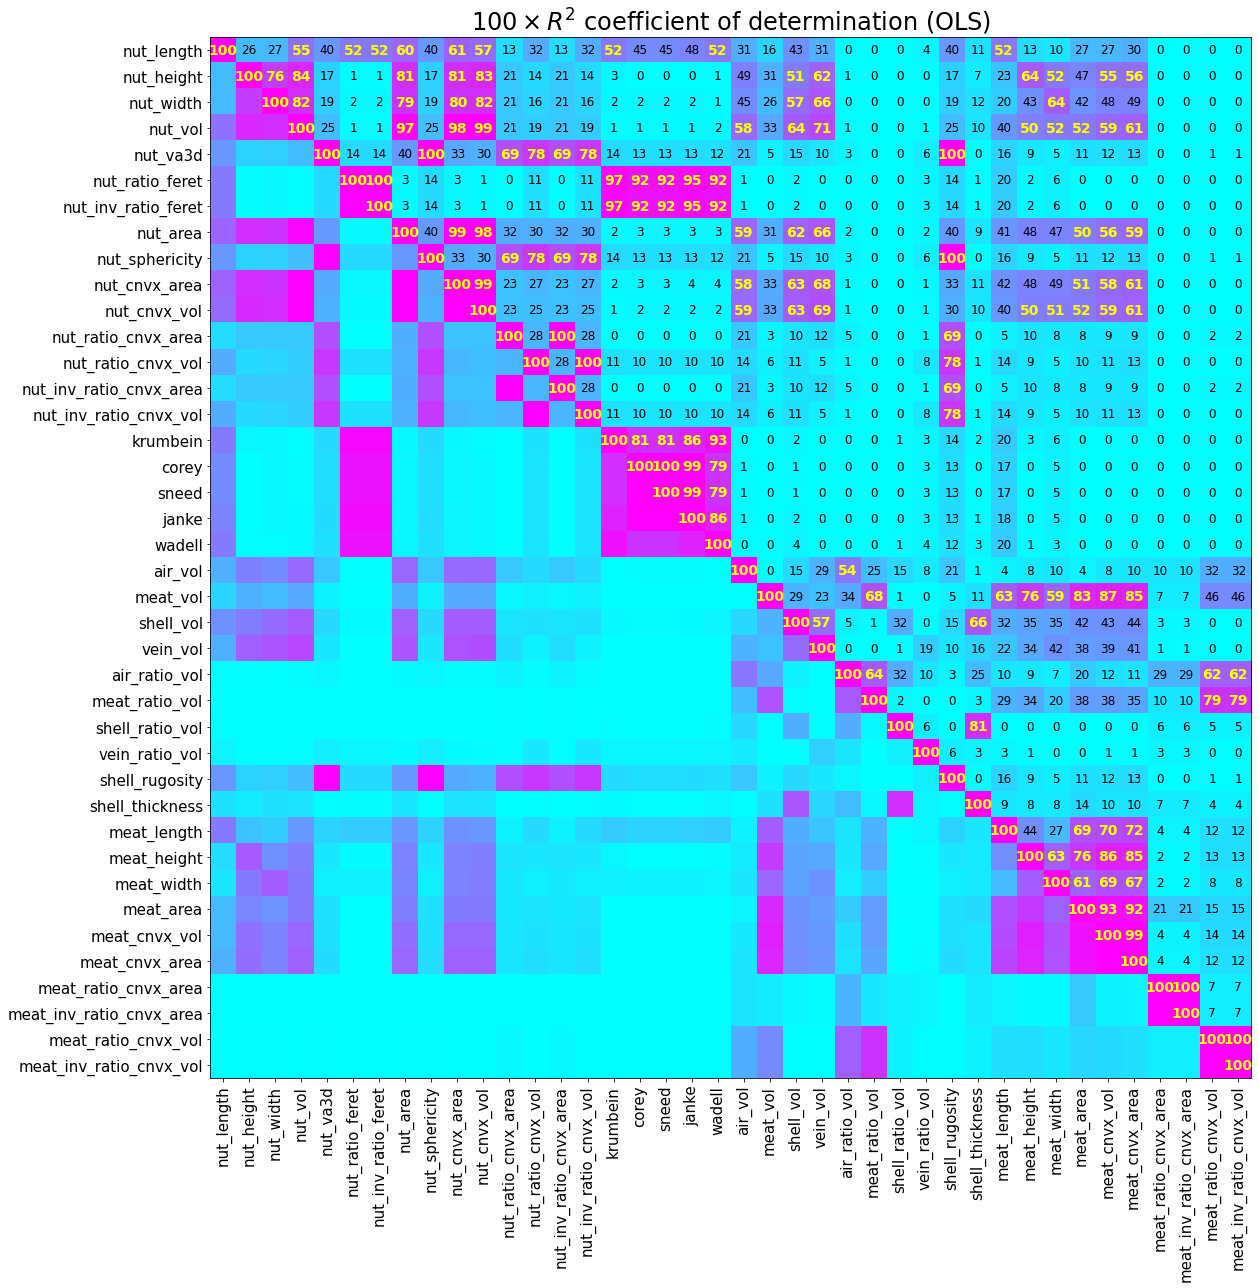

In [20]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(ols_R2, cmap='cool', vmin=0, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(ols_r)))
ax.set_yticks(np.arange(len(ols_r)))
# ... and label them with the respective list entries
ax.set_xticklabels(data.columns[mmtraits])
ax.set_yticklabels(data.columns[mmtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(len(ols_r)):
    for j in range(i,len(ols_r) ):
        if ols_R2[i,j] > 0.5:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(j, i, '{:d}'.format(int(100*ols_R2[i, j])),
                       ha="center", va="center", color=tcolor, fontsize=fs, fontweight=fw)

ax.set_title("$100 \\times R^2$ coefficient of determination (OLS)", fontsize=24)
fig.tight_layout()

filename = dst + 'OLS_R2_ext'
#plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

In [148]:
ols_R2[0]

array([1.00000000e+00, 2.64476412e-01, 2.71058399e-01, 5.50870642e-01,
       4.09057658e-01, 5.21149881e-01, 5.21149881e-01, 6.09348023e-01,
       4.09057658e-01, 6.16759456e-01, 5.75437390e-01, 1.37366746e-01,
       3.26733678e-01, 1.37366746e-01, 3.26733678e-01, 5.21897393e-01,
       4.56464304e-01, 4.56464304e-01, 4.85080002e-01, 5.21978420e-01,
       3.14648574e-01, 1.68705805e-01, 4.31126468e-01, 3.11757536e-01,
       6.83365354e-03, 8.54465632e-05, 5.80552032e-03, 4.52100501e-02,
       4.09057658e-01, 1.15332602e-01, 5.25825915e-01, 1.37681167e-01,
       1.00151386e-01, 2.72973224e-01, 2.75947422e-01, 3.09710130e-01,
       4.17810424e-03, 4.17810424e-03, 2.40422099e-04, 2.40422099e-04])

In [152]:
ols_R2[3,7]

0.9761736698078999

In [169]:
signif = np.asarray(np.nonzero((ols_R2 < 0.97) & (ols_R2 > 0.75)))
signif = signif[:,signif[0] < signif[1]]
signif = signif[:,::2]
print(signif.shape)
for i in range(signif.shape[1]):
    print(i,np.round(ols_R2[signif[0,i],signif[1,0]], 2),col_labels[signif[0,i]+2],'--',col_labels[signif[1,i] + 2], sep='\t')

(2, 21)
0	0.76	Nut Height	--	Nut Width
1	0.76	Nut Height	--	Nut Surface Area
2	0.76	Nut Height	--	Nut Convex Volume
3	1.0	Nut Width	--	Nut Surface Area
4	1.0	Nut Width	--	Nut Convex Volume
5	0.19	Nut VA3D	--	Nut Convex Volume Inverse Ratio
6	0.03	Nut Feret Ratio	--	Sneed Index
7	0.03	Nut Feret Ratio	--	Wadell Index
8	0.03	Nut Inverse Feret Ratio	--	Sneed Index
9	0.03	Nut Inverse Feret Ratio	--	Wadell Index
10	0.19	Nut Sphericity	--	Nut Convex Volume Inverse Ratio
11	0.17	Nut Convex Volume Inverse Ratio	--	Shell Rugosity
12	0.03	Krumbein Index	--	Sneed Index
13	0.03	Krumbein Index	--	Wadell Index
14	0.03	Sneed Index	--	Wadell Index
15	0.27	Kernel Volume	--	Kernel Height
16	0.27	Kernel Volume	--	Kernel Convex Volume
17	0.0	Kernel Volume Ratio	--	Kernel Convex Volume Ratio
18	0.0	Shell Volume Ratio	--	Shell Thickness
19	0.44	Kernel Height	--	Kernel Convex Volume
20	0.43	Kernel Surface Area	--	Kernel Convex Volume


In [66]:
rma_m = np.zeros((len(mmtraits), len(mmtraits)))
rma_b = rma_m.copy()
rma_R2 = rma_m.copy()

for i in range(len(ols_m)):
    for j in range(len(ols_m)):
        trait_i = np.log(data.iloc[:,mmtraits[i]].values)
        trait_j = np.log(data.iloc[:,mmtraits[j]].values)

        rma = regress2(trait_i, trait_j, _method_type_2="reduced major axis")
        
        rma_R2[i,j] = r2_score(trait_j, rma['predict'])
        rma_m[i, j] = rma['slope']
        rma_b[i, j] = rma['intercept']

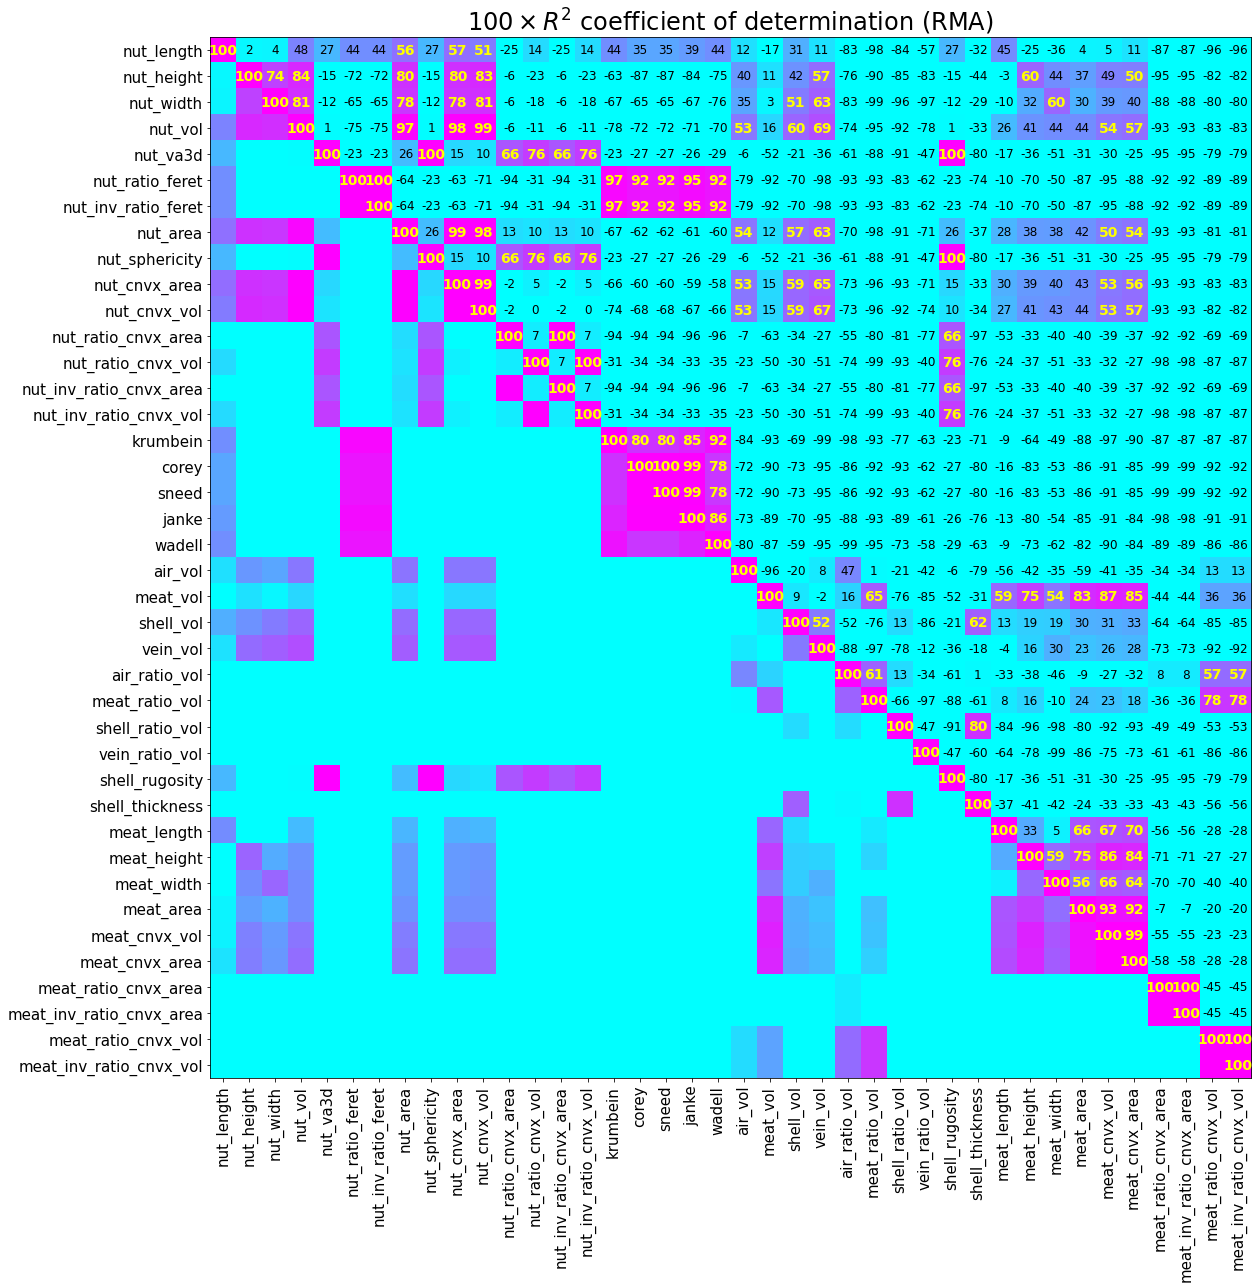

In [67]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(rma_R2, cmap='cool', vmin=0, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(rma_R2)))
ax.set_yticks(np.arange(len(rma_R2)))
# ... and label them with the respective list entries
ax.set_xticklabels(data.columns[mmtraits])
ax.set_yticklabels(data.columns[mmtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(len(rma_R2)):
    for j in range(i,len(rma_R2) ):
        if rma_R2[i,j] > 0.5:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(j, i, '{:d}'.format(int(100*rma_R2[i, j])),
                       ha="center", va="center", color=tcolor, fontsize=fs, fontweight=fw)

ax.set_title("$100 \\times R^2$ coefficient of determination (RMA)", fontsize=24)
fig.tight_layout()

filename = dst + 'RMA_R2_ext'
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

# Link to categorical traits from Pat Brown

In [5]:
filename = '../all_phenos_for_Erik_221024.csv'
attr = pd.read_csv(filename)
print(attr.shape)
attr.head()

(720, 20)


,UCACCSD,YR,LOCATE,ROW,TREE,ShellIntegrity,ShellTexture,ShellColor,SEAL,ShellStrength,ShellThickness,PackingTissue,KernelFill,%TipShrivel,%MinorShrivel,%MajorShrivel,Plumpness,EaseOfRemoval,PercentKernel,%Blank
0,06-013-20,2017,2008SB,1,32,7,5,7,NaN,7.0,1.4,6,NaN,0.0,16.666667,50.0,4.0,6,42.068325,40.0
1,06-005-27,2017,2008SB,4,13,7,4,3,6.0,6.0,1.5,6,5.0,0.0,0.000000,0.0,4.0,6,48.389312,0.0
2,06-005-27,2018,2008SB,4,13,7,4,4,5.0,6.0,1.3,6,5.0,0.0,0.000000,0.0,3.0,6,45.129940,0.0
3,06-004-4,2018,2008SB,5,2,7,4,5,5.0,4.0,1.1,5,6.0,0.0,0.000000,0.0,4.0,5,61.793049,0.0
4,06-004-4,2020,2008SB,5,2,7,4,4,5.0,5.0,1.1,5,5.0,0.0,22.222222,0.0,4.0,5,59.731800,10.0


In [77]:
cattraits = np.zeros((len(data), 15)) - 1
for i in range(len(cattraits)):
    locate, Rrow, Ttree = data.iloc[i,0].split('_')
    row = int(Rrow[1:])
    tree = int(Ttree[1:])

    metadf = attr[(attr['LOCATE']==locate) & (attr['ROW']==row) & (attr['TREE']==tree)]
    if len(metadf) > 0:
        meta = metadf.iloc[0]
        cattraits[i] = meta.iloc[5:].values.astype(float)

foo = pd.DataFrame(cattraits, columns=attr.columns[5:])

In [90]:
df = pd.concat([data, foo], axis=1)

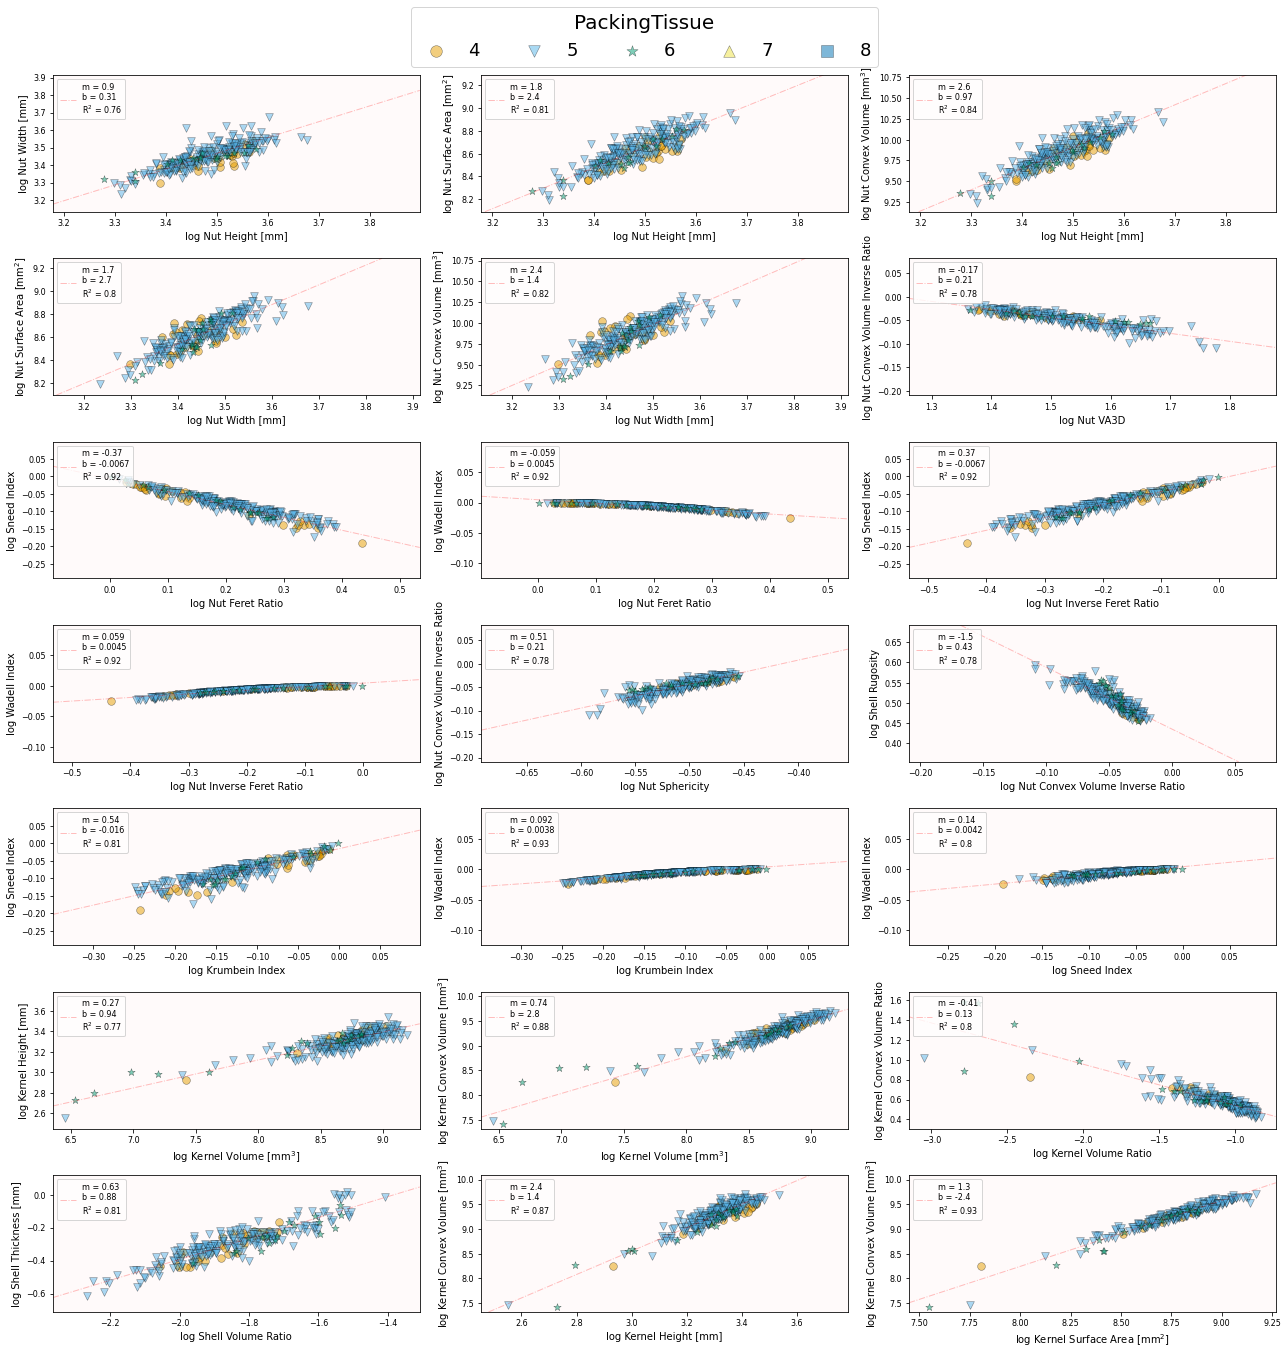

In [177]:
fs = 8
marker = ['o', 'v','*','^', 's', '<', 'X', '>', 'p', '8', 'h', 'H', 'D', 'd', 'P']
col_wong = ['#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00', '#cc79a7',
            '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00', '#cc79a7']
cattraitname = 'EaseOfRemoval'
cattraitname = 'ShellStrength'
cattraitname = 'ShellIntegrity'
cattraitname = 'ShellTexture'
cattraitname = 'PackingTissue'
cattrait = np.sort(pd.unique(attr[cattraitname]))

fig, ax = plt.subplots(7,3, figsize=(18,18))
ax = np.atleast_1d(ax).ravel()

for idx in range(len(ax)):
    i,j = signif[0,idx], signif[1,idx]

    trait_i = np.log(data.iloc[:,i+2].values)
    trait_j = np.log(data.iloc[:,j+2].values)
    
    ax[idx].set_ylabel('log ' + col_labels[j+2] + col_units[j+2], fontsize=fs+2);
    ax[idx].set_xlabel('log ' + col_labels[i+2] + col_units[i+2], fontsize=fs+2);
    ax[idx].set_xlim((np.min(trait_i)-0.1, np.max(trait_i)+0.1))
    ax[idx].set_ylim((np.min(trait_j)-0.1, np.max(trait_j)+0.1))
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    #ax[idx].set_title(cattraitname, fontsize=fs+5)

    axlabel = 'm = {:.2}\nb = {:.2}\nR$^2$ = {:.2}'.format(ols_m[i,j], ols_b[i,j], ols_R2[i,j])
    bar = ax[idx].axline(xy1=(0,ols_b[i,j]), slope=ols_m[i,j], color='r', 
                         label=axlabel, ls='-.', lw=1, alpha=0.25)
    ax[idx].legend(loc='upper left', fontsize=fs)

    for k in range(len(cattrait)):
        ax[idx].scatter(trait_i[df[cattraitname] == cattrait[k]], 
                        trait_j[df[cattraitname] == cattrait[k]],
                        color=col_wong[k], marker=marker[k], s=60, alpha=0.5,
                        edgecolor='k', linewidth=0.5, label=cattrait[k])

h, l = ax[idx].get_legend_handles_labels()
ordering = list(range(1,len(h)))

fig.legend(h[1:], l[1:], title=cattraitname,
           title_fontsize = fs+12, bbox_to_anchor=(0.5, 1.05),
           fontsize = fs+10, markerscale=1.5,
           loc = 'upper center', fancybox=True, ncol=6);
fig.tight_layout()

filename = dst + cattraitname + '_allometry'
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

In [123]:
ordering

[1, 2, 3, 4, 5, 6]

In [120]:
l

['m = 0.97\nb = -1.6\nR$^2$ = 0.64', '6', '5', '4', '7', '3', '8']

In [95]:
cattraitname = 'EaseOfRemoval'

cattrait

array([6, 5, 4, 7, 3, 8])